In [1]:
#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [3]:
#import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print(tf.__version__)

2.0.0


In [5]:
#importing fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

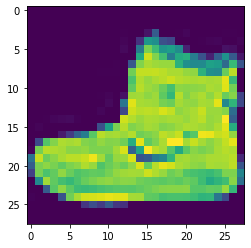

In [14]:
plt.figure()
plt.imshow(train_images[0])

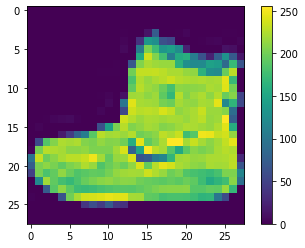

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

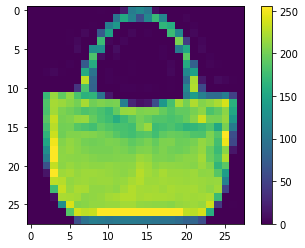

In [20]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.show()

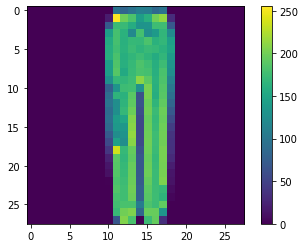

In [21]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.show()

## Preprocessing the data

In [25]:
train_images = train_images / 255
test_images = test_images / 255

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


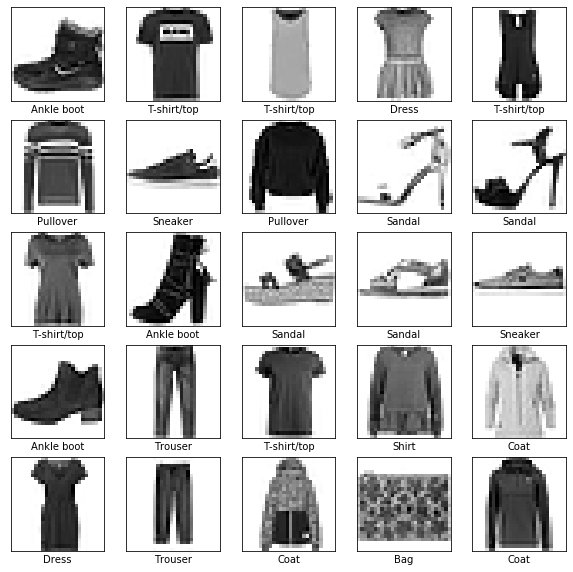

In [62]:
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap  = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) #this basically gives the name of the object rather than a number between 0 to 9

plt.show()
    

## Setting up the layers

In [31]:
# Input layer = Flatten the 2D array (28*28) into 1D array (28*28 = 784)
# Hidden layer = Dense fully connected layer of 28 nodes(ReLu)
# Output layer  = Dense fully connected layer of 10 nodes (softmax)

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [35]:
model

## Compile and optimize the model

In [37]:
# Loss function = measures how accurate the output is
# Optimizer = measures how the model is updates
# Metrics = monitors the training to determine when to stop

In [38]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the model

In [39]:
# We are going to train the models in 10 epochs (that is complete presentaion of the training dataset)
# This means that we would feed the 60,000 images and labels into the network 10 different time
# For each epoch we would see both the loss and the accuracy of the model

In [40]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4937 - accuracy: 0.8262
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3733 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3369 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3112 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2943 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2800 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2674 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2554 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2471 - accuracy: 0.9072
Epoch 10/10
60

In [41]:
test_images.shape

(10000, 28, 28)

## Making predictions

In [42]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
predictions = model.predict(test_images)

In [44]:
test_images.shape

(10000, 28, 28)

In [45]:
predictions.shape

(10000, 10)

In [47]:
# a prediction is an array of 10 numbers. Each element represents the confidence that the image corresponds to the each of the 10 different classes
predictions[0]

array([6.0944800e-09, 4.9194215e-11, 1.5600768e-10, 1.5333309e-11,
       3.4049577e-08, 2.4781973e-04, 4.0899664e-07, 4.4403118e-03,
       2.3708463e-07, 9.9531108e-01], dtype=float32)

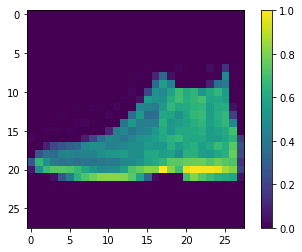

In [51]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

## Evaluating the predictions

In [100]:
# function to plot an image

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
            
    

In [103]:
# function to create bar plot of the predictions

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, train_labels[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

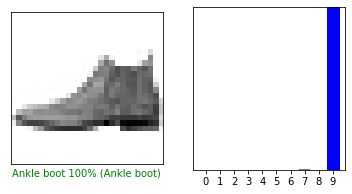

In [104]:
i = 0

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)

plt.show()

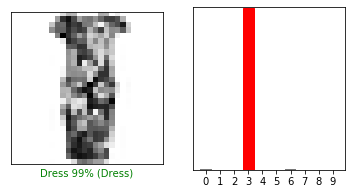

In [105]:
i = 100

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)

plt.show()

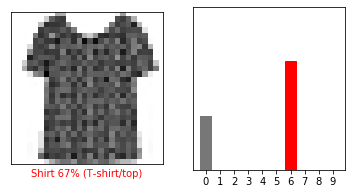

In [106]:
i = 1000

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)

plt.show()

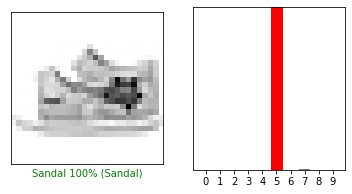

In [107]:
i = 9999

plt.figure(figsize = (6,3))

plt.subplot(1,2,1)

plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)

plot_value_array(i, predictions[i], test_labels)

plt.show()

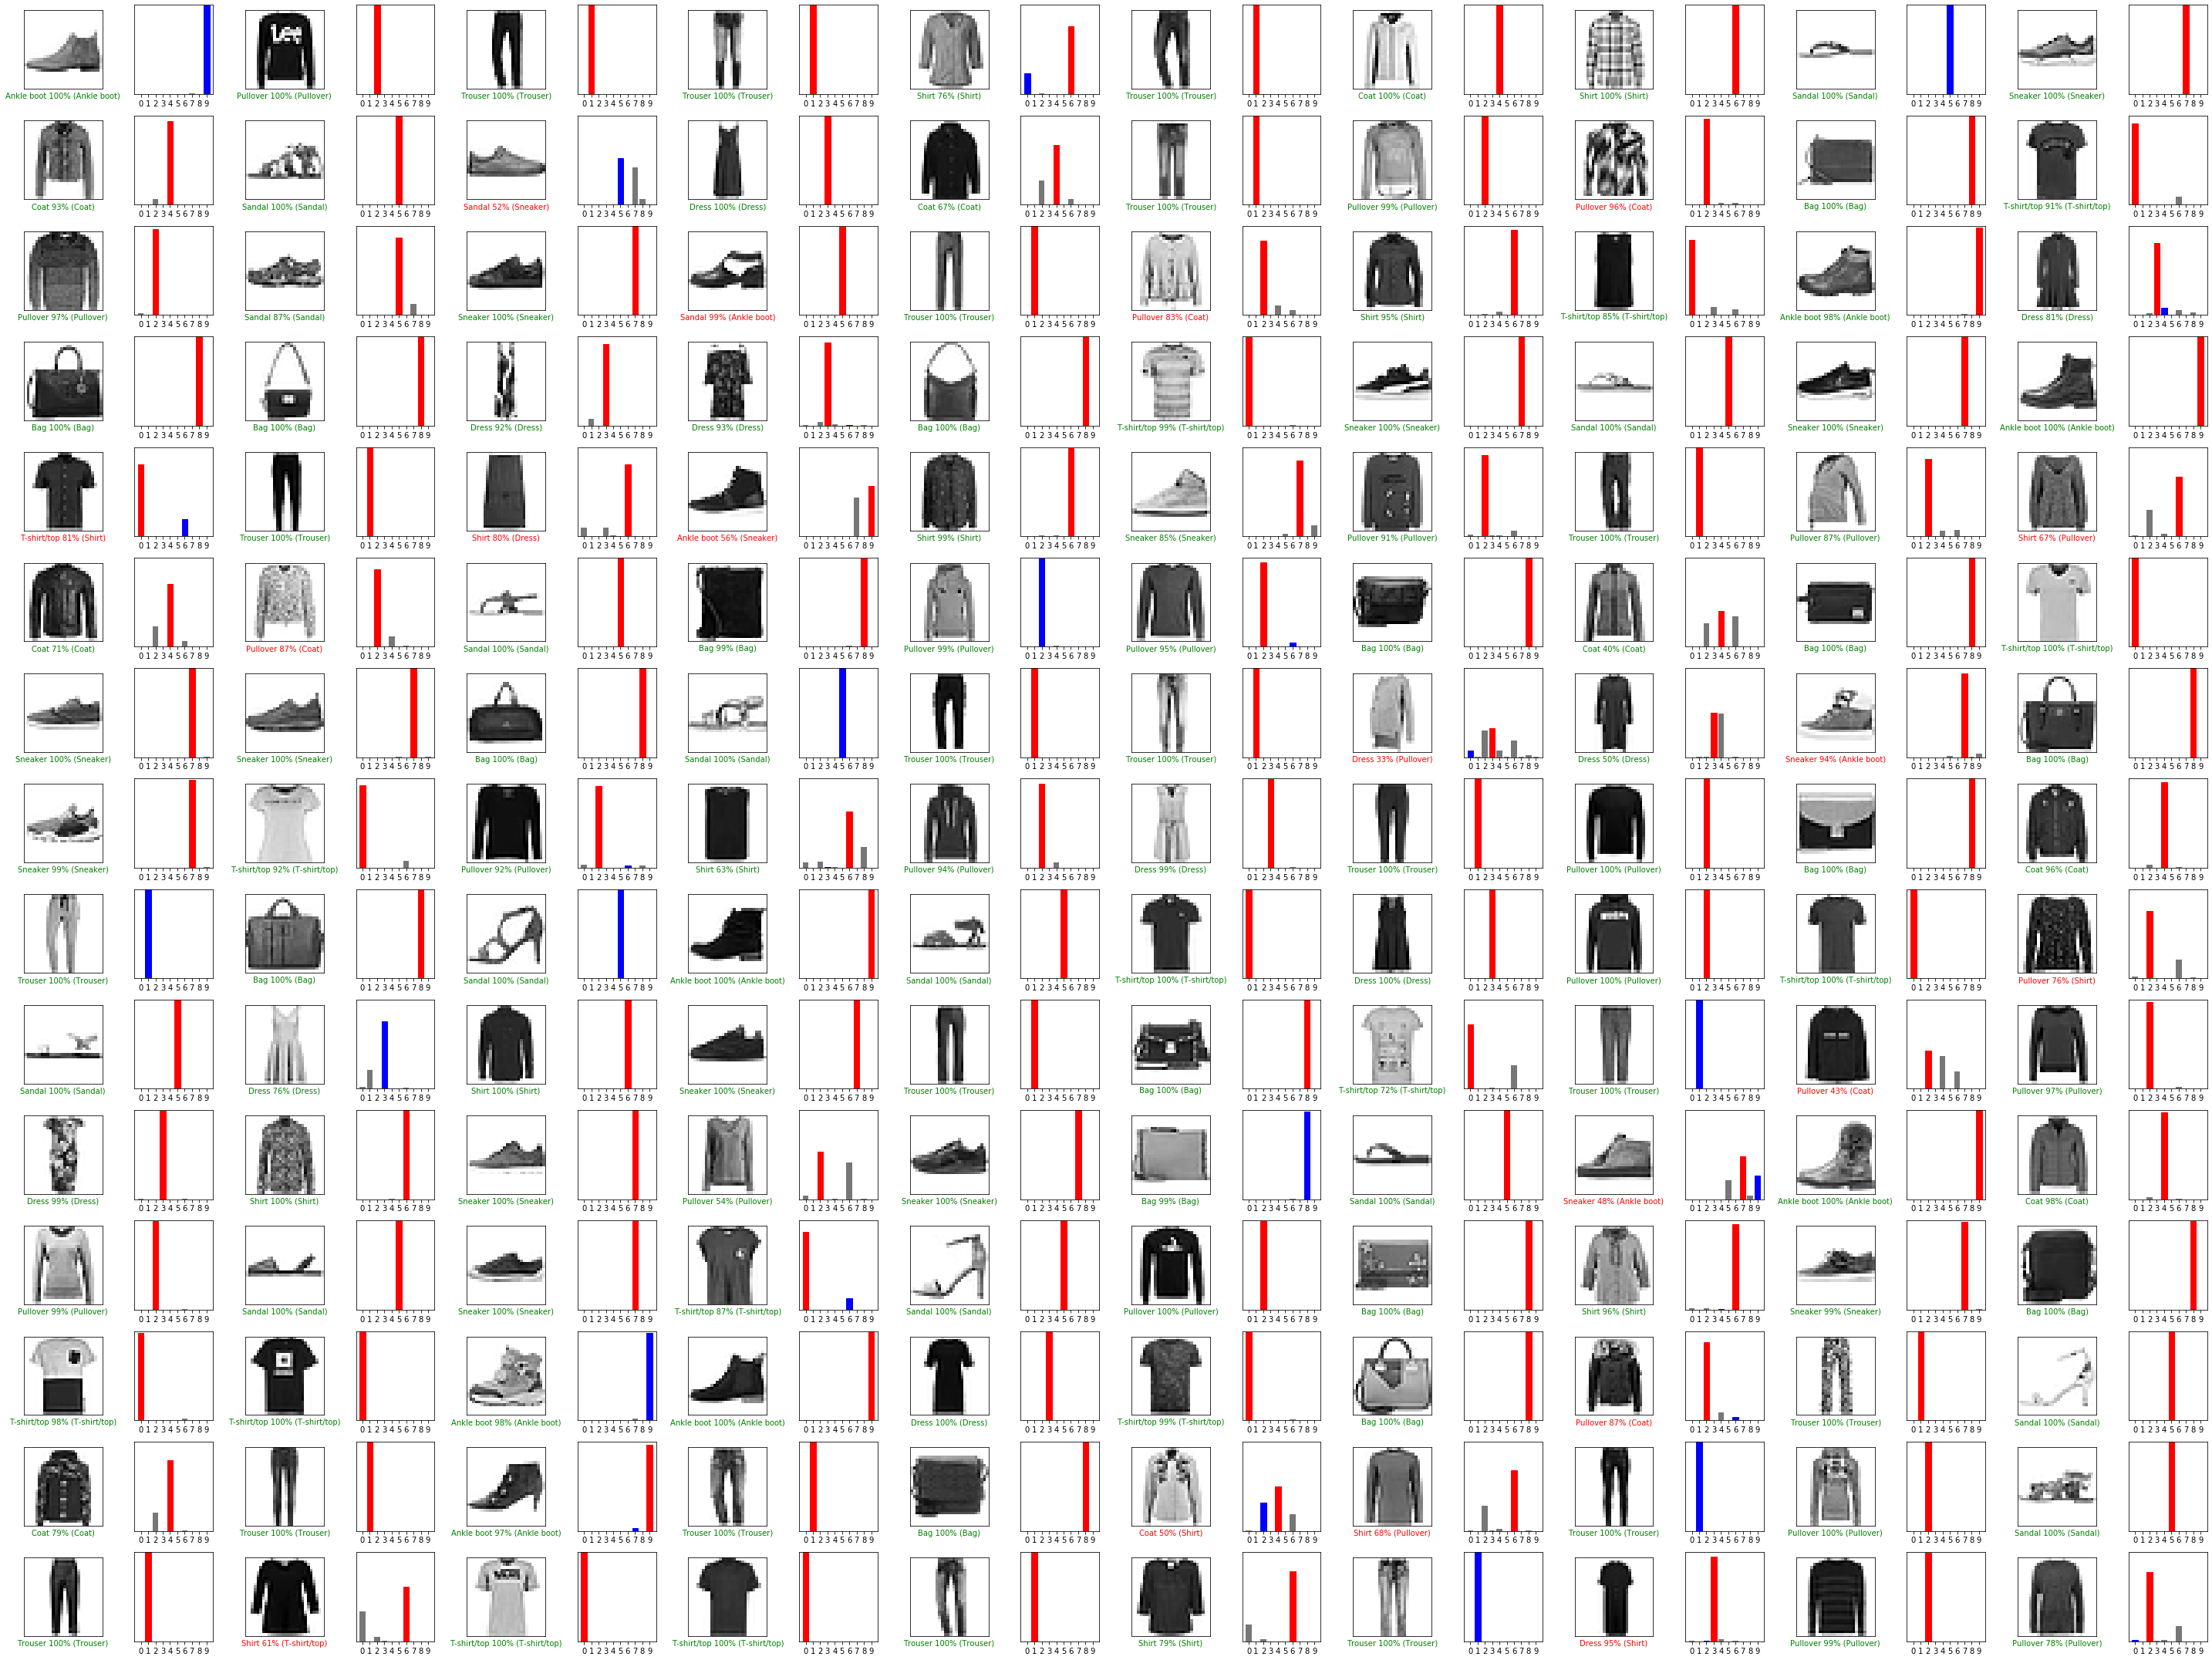

In [108]:
rows = 15
columns = 10

num_images = rows * columns

plt.figure(figsize = (2*2*columns, 2*rows))

for i in range(num_images):
    plt.subplot(rows, 2*columns, 2*i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Prediction on a single image

In [109]:
img = test_images[8]
img.shape

(28, 28)

In [110]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [111]:
my_prediction = model.predict(img)
my_prediction

array([[9.4356301e-07, 1.1721447e-12, 2.5529572e-09, 5.1788127e-12,
        5.4386912e-10, 9.9999726e-01, 4.3652313e-09, 1.6358438e-06,
        8.7569397e-08, 1.3818224e-08]], dtype=float32)

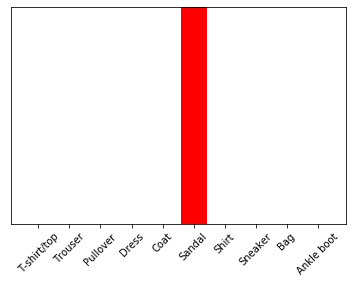

In [113]:
plot_value_array(1, my_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

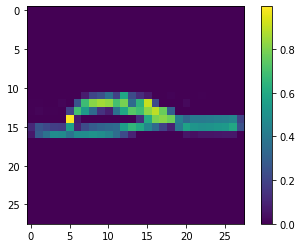

In [114]:
plt.figure()
plt.imshow(test_images[8])
plt.colorbar()
plt.show()